# Advent Day 6

[Day 6 Challenge](https://adventofcode.com/2018/day/6)

# Puzzle 1

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
with open('data/day6_input.txt', 'r') as f:
    points = f.readlines()
    
points = [(int(line.split(',')[0]), int(line.split()[1])) for line in points]

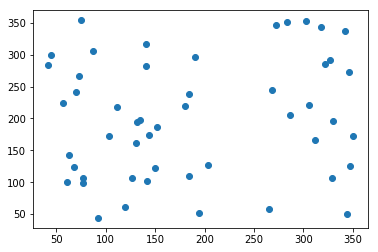

In [3]:
plt.scatter(x=[point[0] for point in points], 
            y=[point[1] for point in points])

In [4]:
def manhattan_distance(pt1, pt2):
    return abs(pt1[0] - pt2[0]) + abs(pt1[1] - pt2[1])

The purpose of the following cell is to remove the points that have infinite area.

In [5]:
min_x = min([point[0] for point in points])
max_x = max([point[0] for point in points])
min_y = min([point[1] for point in points])
max_y = max([point[1] for point in points])

points_closest_to_a_point_beyond_the_border = set()

for x in [min_x-1, max_x+1]:
    for y in [min_y-1, max_y+1]:
        points_closest_to_a_point_beyond_the_border.add(min(points, key = lambda point: manhattan_distance(point, (x, y))))


points = set(points).difference(points_closest_to_a_point_beyond_the_border)

This next cell creats an object that conveniently stores the Manhattan distance between all points of interest.

In [6]:
min_points = {}
for i in range(min_x, max_x):
    for j in range(min_y, max_y):
        for point in points:
            if (i,j) in min_points.keys():                
                min_points[(i,j)] += [(point, manhattan_distance(point, (i,j)))]
            else:
                min_points[(i,j)] = [(point, manhattan_distance(point, (i,j)))]

This cell sorts the nearest points, eliminates any points that are equidistant from multiple points of interest, and then finds the point of interest with the most points.

In [7]:
# Counter(min_points).most_common(15)
for point, lst in min_points.items():
    lst.sort(key=lambda point_distance_pair: point_distance_pair[1])
    
closest_points = []
for point, lst in min_points.items():
    if lst[0][1] != lst[1][1]:
        closest_points += [lst[0][0]]

largest_finite_area = Counter(closest_points).most_common(1)[0][1]

In [8]:
print(f"The largest finite area is {largest_finite_area}.")

The largest finite area is 5429.


# Puzzle 2

In [9]:
with open('data/day6_input.txt', 'r') as f:
    points = f.readlines()
    
points = [(int(line.split(',')[0]), int(line.split()[1])) for line in points]

In [10]:
points_within_max_dist = []
max_dist = 10000

for x in range(min_x, max_x):
    for y in range(min_y, max_y):
        total_dist = 0
        for point in points:
            if total_dist > max_dist:
                break
            else:
                total_dist += manhattan_distance((x,y), point)
        if total_dist < max_dist:
            points_within_max_dist += [(x,y)]

num_points = len(points_within_max_dist)

In [11]:
print(f"The number of points under {max_dist} Manhattan Distance from all points is {num_points}.")

The number of points under 10000 Manhattan Distance from all points is 32614.
